# Intro to Autoencoders

## Import TensorFlow and other libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
#from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

## Load the dataset
To start, you will train the basic autoencoder using the Fashon MNIST dataset. Each image in this dataset is 28x28 pixels. 

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


## First example: Basic autoencoder



In [ ]:
input = layers.Input(shape=(784))
x = layers.Dense(500,activation = 'relu')(input)
x = layers.Dense(300,activation = 'relu')(x)
x = layers.Dense(150,activation = 'relu')(x)
x = layers.Dense(100,activation = 'relu')(x)
code = layers.Dense(64,activation = 'relu')(x)
x = layers.Dense(100,activation = 'relu')(code)
x = layers.Dense(150,activation = 'relu')(x)
x = layers.Dense(300,activation = 'relu')(x)
x = layers.Dense(500,activation = 'relu')(x)
output = layers.Dense(784,activation = 'relu')(x)

autoencoder = Model(input,output)

autoencoder.summary()
#tf.keras.utils.plot_model(autoencoder)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 150)               45150     
                                                                 
 dense_3 (Dense)             (None, 100)               15100     
                                                                 
 dense_4 (Dense)             (None, 64)                6464      
                                                                 
 dense_5 (Dense)             (None, 100)               6500  

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0188 - val_loss: 0.0182
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0173 - val_loss: 0.0166
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0163 - val_loss: 0.0163
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0157 - val_loss: 0.0157
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0153 - val_loss: 0.0152
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0148 - val_loss: 0.0147
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0144 - val_loss: 0.0145
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0141 - val_loss: 0.0143
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0137 - val_loss: 0.0141
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.013

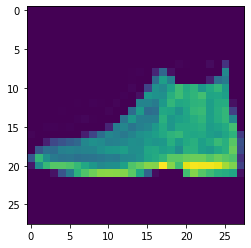

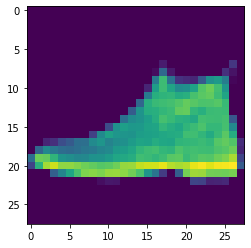

In [ ]:
reconstructed = autoencoder.predict(x_test)
plt.imshow(x_test[0].reshape(28,28)*255)
plt.show()
plt.imshow(reconstructed[0].reshape(28,28)*255)
plt.show()

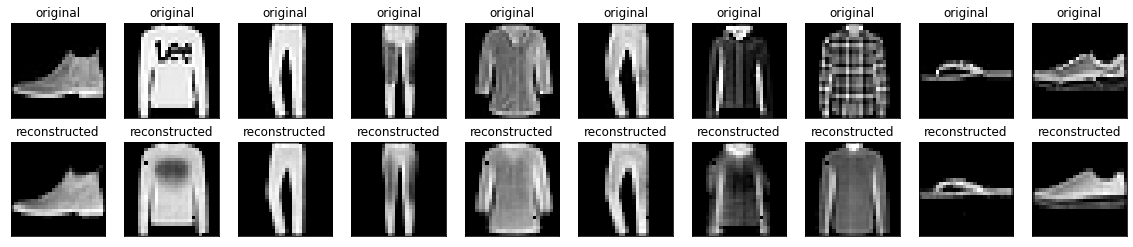

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28,28)*255)
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(reconstructed[i].reshape(28,28)*255)
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

**Segmentation Autoencoder**

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


Creating mask for the dataset

In [4]:
'''
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

'''
x_train_mask = np.logical_and(x_train,np.ones(x_train.shape))
x_test_mask = np.logical_and(x_test,np.ones(x_test.shape))

In [7]:
print(x_train_mask.max())

True


Plot the mask.


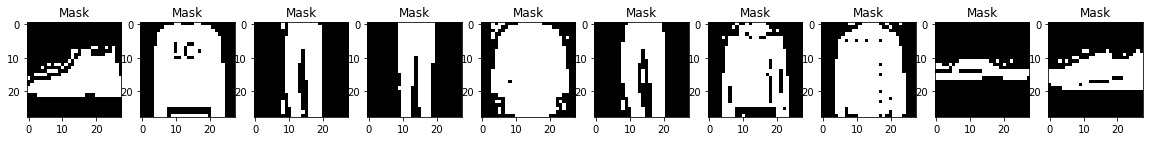

In [5]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("Mask")
    plt.imshow(tf.squeeze(x_test_mask[i]))
    plt.gray()
plt.show()

### Define a convolutional autoencoder

In this example, you will train a convolutional autoencoder using  [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) layers in the `encoder`, and [Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose) layers in the `decoder`.

In [8]:
autoencoder= tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 3,217
Trainable params: 3,217
Non-trainabl

In [9]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [10]:
autoencoder.fit(x_train,x_train_mask,
                epochs=30,
                shuffle=True,
                validation_data=( x_test,x_test_mask))

Epoch 1/30
1875/1875 [==============================] - 18s 3ms/step - loss: 0.0548 - val_loss: 0.0398
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0375 - val_loss: 0.0352
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0327 - val_loss: 0.0305
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0293 - val_loss: 0.0280
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0270 - val_loss: 0.0259
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0248 - val_loss: 0.0242
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0235 - val_loss: 0.0231
Epoch 8/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0227 - val_loss: 0.0223
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0221 - val_loss: 0.0218
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.02

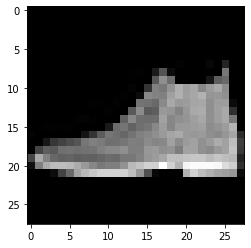

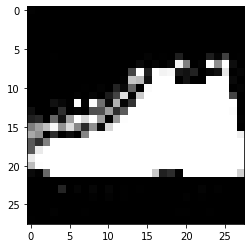

In [11]:
reconstructed = autoencoder.predict(x_test)
plt.imshow(tf.squeeze(x_test[0]))
plt.show()
plt.imshow(tf.squeeze(reconstructed[0]))
plt.show()

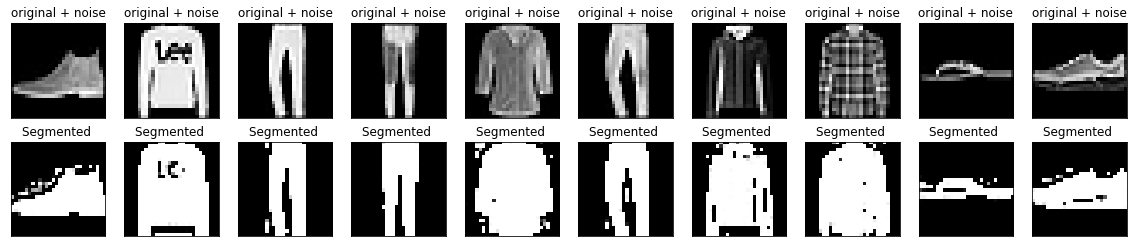

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("Segmented ")
    plt.imshow(tf.squeeze(reconstructed[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()